<a href="https://colab.research.google.com/github/fbponz/grupo6_pepy/blob/fbponz/tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The database Retail Data Analytics contains historical data for 45 stores (and each of their departmente) located in different regions. 
There are three different files containing different information, that can be merged by the store ID (identification number of each retail store). 
1. Store: This file contains the following variables:

- Store: Store identification number.
- Type: A, B, o C.
- Size: Expressed in square feet.

2. Features: This file contains inforation related to the stores, the departments, and the regional activity.
- Store: Store identification number.
- Date: Week
- Temperature: Average temperature in region.
- Fuel_Price: Cost of fuel in the region
- MarkDown1-5: Anonymized data related to promotional markdowns. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA
- CPI: Consumer price index
- Unemployment rate: The unemployment rate
- IsHoliday: This variable indicates whether the week is a special      holiday week.

3. Sales: Historical sales data from 2010-02-05 to 2012-11-01:
- Store: Store identification number.
- Dept: Department identification number.
- Date: Week
- IsHoliday: This variable indicates whether the week is a special holiday week.

This data is useful to predict department-wide sales in the coming years, and to analyse the impact of mardowns on holiday weekes. 
The analysis could help in providing recommendations based on data to increase sales and adapt the business model to changing environments.

Below, we describe some of the variables (either nominal or cuantitative).

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import and QC:

In [6]:
#os.getcwd()
#os.chdir()

#In order for Colab to work, we have to import the CSVs every time
#Load Retail csvs
features = pd.read_csv("/content/features_dataset.csv")
sales = pd.read_csv("/content/sales_dataset.csv")
stores = pd.read_csv("/content/stores_dataset.csv")


#QC
features.shape
features.head()
features.tail()

sales.shape
sales.head()
sales.tail()

stores.shape
stores.head()
stores.tail()
#QC OK

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


Pablo's Variables:

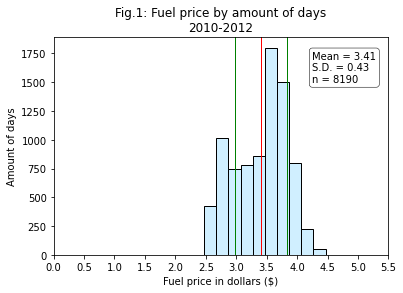

As expected, the fluctuation of fuel prices is not considerably large. 
The mean lies at 3.41$ and the standard deviation is 0.43. Nevertheless, 
the most frequent price was around 3.65$.



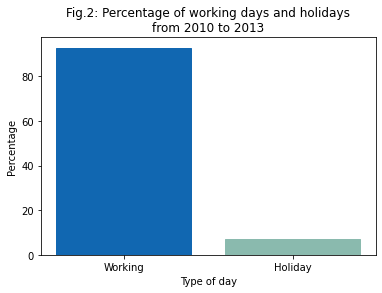

Only over 7% of the days are holidays. Nonetheless, the dataset starts 
in February and ends in July. Therefore, such number does not fully reflect the 
absolute amount of holidays in a year.


In [ ]:
#####STATISTICS
#Quantitative variable Fuel_Price
features.Fuel_Price.describe() 
fuel_price_stats = features.Fuel_Price.describe()

m = fuel_price_stats[1]
s = fuel_price_stats[2]
n = fuel_price_stats[0]
x = features["Fuel_Price"]

plt.hist(x, edgecolor="black", color="#d0efff")
ticks = np.arange(0,6,0.5)
plt.xticks(ticks)
plt.xlabel("Fuel price in dollars ($)")
plt.ylabel("Amount of days")
plt.title("Fig.1: Fuel price by amount of days" "\n" "2010-2012")
textstr = "Mean = 3.41\nS.D. = 0.43\nn = 8190" #texto a imprimir
props = dict(boxstyle="round", facecolor="white", lw=0.5) #Creamos un recuadro
plt.text(4.25, 1500, textstr, bbox=props) #texto en esa posicion
plt.axvline(x=m, linewidth=1, linestyle="solid", color="red", label="Mean")
plt.axvline(x=m-s, linewidth=1, linestyle="solid", color="green", label="S.D." )
plt.axvline(x=m+s, linewidth=1, linestyle="solid", color="green", label="-S.D." )
plt.show()

print("""As expected, the fluctuation of fuel prices is not considerably large. 
The mean lies at 3.41$ and the standard deviation is 0.43. Nevertheless, 
the most frequent price was around 3.65$.""")
print()#Blank line

#Nominal variable isHoliday
features.IsHoliday.describe()
IsHoliday_stats = features.IsHoliday.describe() 
y = features["IsHoliday"]
holiday_freq = features.groupby(["IsHoliday"]).size()
holiday_freq.sum()
n = holiday_freq.sum()
holiday_freq2 = (holiday_freq/n)*100

bar_list = ["Working", "Holiday"]
bar_chart = plt.bar(bar_list,holiday_freq2)
bar_chart[0].set_color("#1167b1")
bar_chart[1].set_color("#8abaae")
plt.xlabel("Type of day")
plt.ylabel("Percentage")
plt.title("Fig.2: Percentage of working days and holidays" "\n" "from 2010 to 2013")
plt.show()

print("""Only over 7% of the days are holidays. Nonetheless, the dataset starts 
in February and ends in July. Therefore, such number does not fully reflect the 
absolute amount of holidays in a year.""")

*Inés*: Dataset Stores. Description of Type (nominal) and Size (cuantitative)

Type (Nominal)

Type
A    22
B    17
C     6
dtype: int64
Type
A    48.888889
B    37.777778
C    13.333333
dtype: float64


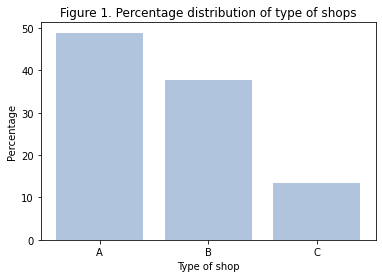

In [ ]:
# Frequencies

mytable = stores.groupby(['Type']).size()
print(mytable)

## Percentage

mytable.sum()
n=mytable.sum()

mytable2= (mytable/n)*100
print(mytable2)

mytable3 = round(mytable2,1)
mytable3

## Bar chart

bar_list = ['A', 'B', 'C']
plt.bar(bar_list, mytable2, color='lightsteelblue')
plt.ylabel('Percentage')
plt.xlabel('Type of shop')
plt.title('Figure 1. Percentage distribution of type of shops')
plt.show()

# We observe that almost 50% are Type A stores, whereas we only 20% of the stores are classified as Type B. 

Size (Cuantitative)

count        45.000000
mean     130287.600000
std       63825.271991
min       34875.000000
25%       70713.000000
50%      126512.000000
75%      202307.000000
max      219622.000000
Name: Size, dtype: float64


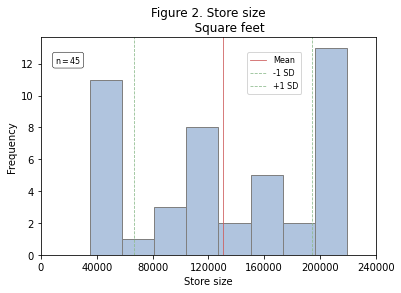

In [ ]:
res= stores.Size.describe()
print(res)

m=round(res[1],1)
sd=round(res[2],1)
n=res[0]


x=stores.Size

ticks=np.arange(0,280000,40000)
props=dict(boxstyle='round', facecolor= 'white', lw=0.5)
textstr='$\mathrm{n}=%.0f$'%(n)


plt.hist(x, edgecolor='grey', color='lightsteelblue', bins=8)
plt.xticks(ticks)
plt.title('Figure 2. Store size''\n' '           Square feet')
plt.ylabel('Frequency')
plt.xlabel('Store size')
plt.text (10000,12, textstr, fontsize=8, bbox=props)
plt.axvline(x=m, linewidth=0.8, linestyle= 'solid', color="indianred", label='Mean')
plt.axvline(x=m-sd, linewidth=0.8, linestyle= 'dashed', color="darkseagreen", label='-1 SD')
plt.axvline(x=m+sd, linewidth=0.8, linestyle= 'dashed', color="darkseagreen", label='+1 SD')
plt.legend(loc='best', bbox_to_anchor=(0.79,0.95), fontsize=8)
plt.show()

## We observe that average size equals 130287.6, and standard deviation equals almost 64.00, a pretty high value. Moreover, the graph indicates that the size of the majority of the stores is close to the minimum and maximum values.

Borja: Datasets stores
Cuantitative Weekly Sales

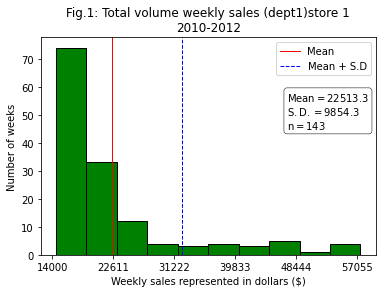

In [10]:
store_1_dept_1 = sales[((sales["Store"] == 1)&(sales["Dept"] == 1))]
week_sales_store_1 = store_1_dept_1["Weekly_Sales"]


week_sales_description = store_1_dept_1.Weekly_Sales.describe()

ticks = np.arange(week_sales_description["min"]-537,week_sales_description["max"]+7,((week_sales_description["max"]-week_sales_description["min"])/5))

mean_wsd = week_sales_description["mean"]
std_wsd = week_sales_description["std"]
number_wsd = week_sales_description["count"]

box_string = '$\mathrm{Mean}=%.1f$\n$\mathrm{S.D.}=%.1f$\n$\mathrm{n}=%.0f$'%(mean_wsd, std_wsd, number_wsd)
props = dict(boxstyle='round', facecolor='white', lw=0.5)

plt.hist(week_sales_store_1, edgecolor="black", color="green")

plt.xticks(ticks)
plt.xlabel("Weekly sales represented in dollars ($)")
plt.ylabel("Number of weeks")
plt.title("Fig.1: Total volume weekly sales (dept1)store 1" "\n" "2010-2012")
plt.text(47200, 45, box_string, bbox=props) 
plt.axvline(x=mean_wsd, linewidth=1, linestyle="solid", color="red", label="Mean")
plt.axvline(x=mean_wsd+std_wsd, linewidth=1, linestyle="dashed", color="blue", label="Mean + S.D")
plt.legend()
plt.show()

Nominal variable: Store Weekly sales

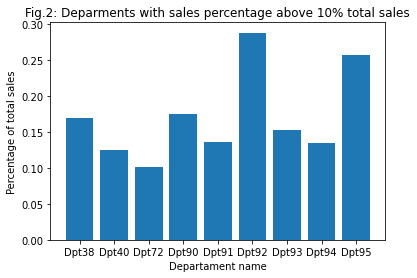

In [9]:
store_1 = sales[sales["Store"] == 1]

total_sales = sales["Weekly_Sales"].sum()
num_total_dept = sales.Dept.unique()

total_dept_sales = []
bar_list = []
for handler in num_total_dept:
    temp = store_1.loc[store_1['Dept']==handler,'Weekly_Sales'].sum()
    if (0.1< ((temp/total_sales)*100)):
        total_dept_sales.append(temp)
        bar_list.append('Dpt'+str(handler))

mytable2 = (total_dept_sales/total_sales)*100

plt.bar(bar_list,mytable2)
plt.xlabel("Departament name")
plt.ylabel("Percentage of total sales")
plt.title("Fig.2: Deparments with sales percentage above 10% total sales")
plt.show()